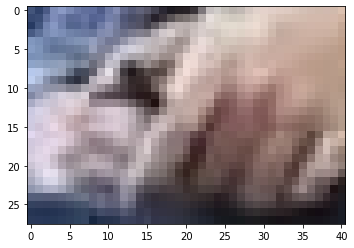

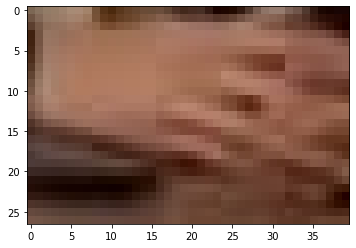

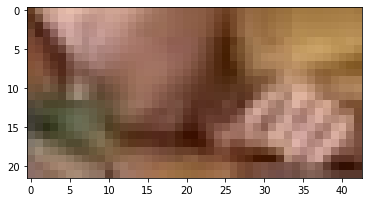

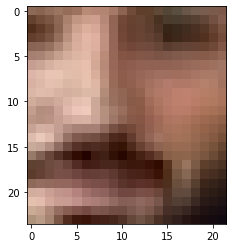

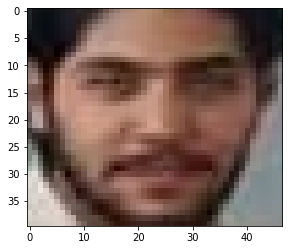

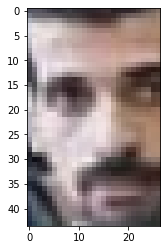

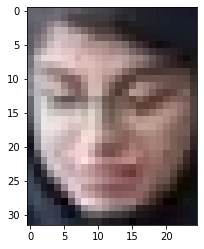

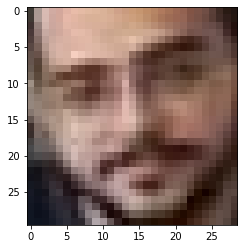

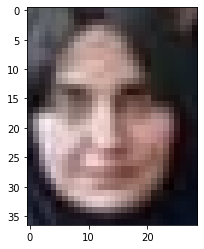

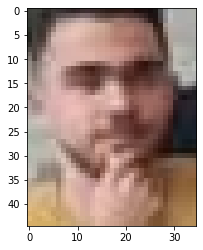

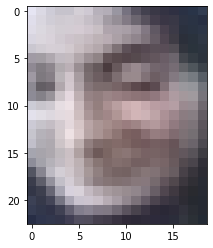

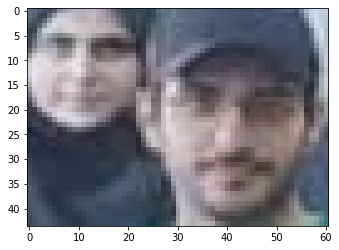

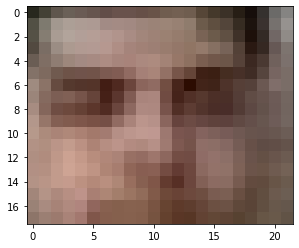

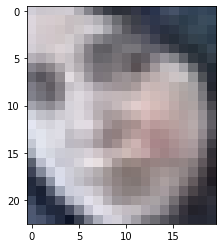

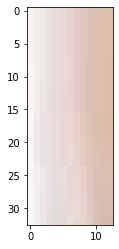

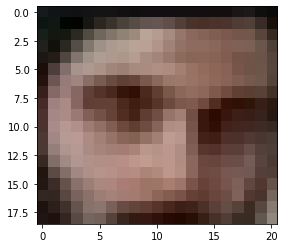

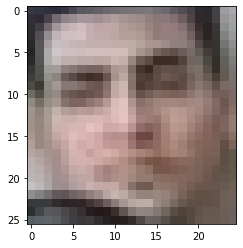

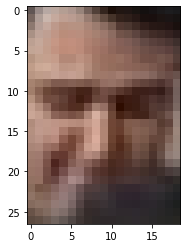

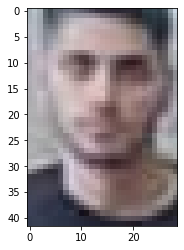

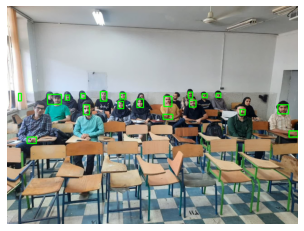

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('class-pic.jpg')

# conversion to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.array(gray, dtype='uint8')

# Convert the image to the HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the bounds of the skin color in HSV using numpy array
first_lower_skin = np.array([0, 10, 60], dtype="uint8")
first_upper_skin = np.array([9, 255, 255], dtype="uint8")

# Create binary mask by applying the color range threshold
first_skin_mask = cv2.inRange(hsv, first_lower_skin, first_upper_skin)

# Define bounds of the skin color in HSV using numpy array
second_lower_skin = np.array([262/2, 0, 0], dtype="uint8")
second_upper_skin = np.array([360/2, 255, 255], dtype="uint8")

# Create the second binary mask by applying the color range threshold
second_skin_mask = cv2.inRange(hsv, second_lower_skin, second_upper_skin)

# Combine the two binary masks using bitwise OR(performs a bitwise OR operation)
skin_mask_combined = cv2.bitwise_or(first_skin_mask, second_skin_mask)

# Apply morphological operations to remove noise and refine the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
skin_mask_combined = cv2.morphologyEx(skin_mask_combined, cv2.MORPH_OPEN, kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
skin_mask_combined = cv2.morphologyEx(skin_mask_combined, cv2.MORPH_CLOSE, kernel)

# Find contours in the skin mask
contours, dash = cv2.findContours(skin_mask_combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


copy_image = image.copy()
faces = []
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    if len(approx) > 7:
        # Apply area threshold to filter out small contours
        area = cv2.contourArea(contour)
        if  200 < area < 1200:
            # Find the bounding box of the contour
            x, y, w, h = cv2.boundingRect(contour)
            faces.append((x, y, w, h))

# Draw rectangles around the detected faces
# separate the face 
for (x, y, w, h) in faces:
   cv2.rectangle(copy_image, (x, y), (x+w, y+h), (0, 255, 0), 3)
   # detect each face
   roi_gray = gray[y:y+h, x:x+w]
   roi_color = image[y:y+h, x:x+w]
   roi_color = cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB)
   plt.imshow(roi_color)
   plt.show()


im_rgb = cv2.cvtColor(copy_image, cv2.COLOR_BGR2RGB)

plt.imshow(im_rgb)
plt.axis('off')
plt.show()